In [1]:
import soditools.soditools as u
import pandas as pd
import numpy as np

In [2]:
country_id = 'CL'

plp_file = f'UPSELL_{country_id}.csv'
plp_bucket = f'bucket_recommender_{country_id.lower()}'
plp_path = f'gs://{plp_bucket}/'

sandbox_file = f'UPSELL_{country_id}.csv'
sandbox_bucket = f'bucket_recommender_sandbox_{country_id.lower()}'
sandbox_path = f'gs://{sandbox_bucket}/'

In [3]:
# df = pd.read_csv(_path+_file)
df_plp = pd.read_csv(plp_path+plp_file)

In [4]:
df_plp.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,7333730,3436888|7333722|343687X|3434206|3436896|343686...,3436888|7333722|343687X|3434206|3436896|343686...,3436888|7333722|343687X|3434206|3436896|343686...,7350864|3436888|1517708|7350783|7333722|343420...,7350864|3436888|7350783|1517708|7350791|733372...,7350864|3436888|1517708|7350783|7333722|343689...
1,3177408,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...
2,7508417,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...
3,3480216,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...
4,746097X,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...


In [5]:
df_sandbox = pd.read_csv(sandbox_path+sandbox_file)

In [6]:
df_sandbox.head()

,productId,upsell_a_pro,upsell_a_hogar,upsell_a_sin_segmento,upsell_b_pro,upsell_b_hogar,upsell_b_sin_segmento
0,265928X,8876622|8876630|8879435|8801045|8878447|887896...,8876622|8876630|8879435|8801045|8878447|887896...,8876622|8876630|8879435|8801045|8878447|887896...,8878226|8879494|8878250|887929X|8876347|333507...,8876681|3062139|8878633|887641X|8878765|214686...,3062139|887641X|3116433|8877300|4276442|887590...
1,3367169,248282|8791058|2898985|745242X|745239X|1468308...,248282|8791058|2898985|745242X|745239X|1468308...,248282|8791058|2898985|745242X|745239X|1468308...,3413403|3413373|679860|2898985|3413381|3380947...,3413403|3938247|3413373|341339X|679860|2898985...,3413403|3413381|3380947|3413373|679860|2898985...
2,8989036,9051341|3405958|3405966|899028X|5367859|536788...,9051341|3405958|3405966|899028X|5367859|536788...,9051341|3405958|3405966|899028X|5367859|536788...,8989052|3405958|3405966|8989028|9051341|899028...,8989052|3405958|3405966|9051341|8989028|898904...,8989052|3405958|8989028|3405966|9051341|899028...
3,8810028,8810796|8809836|881063X|8811067|8811113|881022...,8810796|8809836|881063X|8811067|8811113|881022...,8810796|8809836|881063X|8811067|8811113|881022...,8809496|8810338|8810745|8810699|881077X|881083...,8809496|8810745|8810699|8810184|8810834|881133...,8809496|8810338|8810745|8810699|8810001|881113...
4,638838,7659865|438502|5333946|2778564|439886|438774|4...,7659865|438502|5333946|2778564|439886|438774|4...,7659865|438502|5333946|2778564|439886|438774|4...,438502|638862|638870|438774|439886|2778564|438...,438502|638862|438774|438510|439886|2778564|638...,438502|638943|438774|638862|439886|2778564|638...


In [7]:
df_plp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183931 entries, 0 to 183930
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   productId              183931 non-null  object
 1   upsell_a_pro           176580 non-null  object
 2   upsell_a_hogar         176580 non-null  object
 3   upsell_a_sin_segmento  176580 non-null  object
 4   upsell_b_pro           183931 non-null  object
 5   upsell_b_hogar         183931 non-null  object
 6   upsell_b_sin_segmento  183931 non-null  object
dtypes: object(7)
memory usage: 9.8+ MB


In [8]:
df_sandbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183930 entries, 0 to 183929
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   productId              183930 non-null  object
 1   upsell_a_pro           176579 non-null  object
 2   upsell_a_hogar         176579 non-null  object
 3   upsell_a_sin_segmento  176579 non-null  object
 4   upsell_b_pro           183930 non-null  object
 5   upsell_b_hogar         183930 non-null  object
 6   upsell_b_sin_segmento  183930 non-null  object
dtypes: object(7)
memory usage: 9.8+ MB


In [9]:
_cols = ['productId','upsell_b_sin_segmento','upsell_b_pro','upsell_b_hogar']
df = pd.merge(left=df_plp[_cols], right=df_sandbox[_cols], how='outer', on='productId', suffixes=['_plp','_sandbox'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183932 entries, 0 to 183931
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   productId                      183932 non-null  object
 1   upsell_b_sin_segmento_plp      183931 non-null  object
 2   upsell_b_pro_plp               183931 non-null  object
 3   upsell_b_hogar_plp             183931 non-null  object
 4   upsell_b_sin_segmento_sandbox  183930 non-null  object
 5   upsell_b_pro_sandbox           183930 non-null  object
 6   upsell_b_hogar_sandbox         183930 non-null  object
dtypes: object(7)
memory usage: 9.8+ MB


In [11]:
df.head()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
0,7333730,7350864|3436888|1517708|7350783|7333722|343689...,7350864|3436888|1517708|7350783|7333722|343420...,7350864|3436888|7350783|1517708|7350791|733372...,7350864|3436888|1517708|7350783|7333722|343689...,7350864|3436888|1517708|7350783|7333722|343420...,7350864|3436888|7350783|1517708|7350791|733372...
1,3177408,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|7548044|6016340|6442919|634596...,1529781|3446492|7548044|6016340|6442919|634596...,1529781|3446492|7548044|6016340|6442919|634596...
2,7508417,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|6299415|7499191|629944X|400032...,7508387|7508379|6299415|7499191|629944X|400032...,7508387|7508379|6299415|7499191|629944X|400032...
3,3480216,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7551797|7337302|7638760|7638752|7646194|755348...,7551797|7337302|7638760|7638752|7646194|755348...,7551797|7337302|7638760|7638752|7646194|755348...
4,746097X,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7461100|7461046|7461054|7460503|7460511|746109...,7461100|7461046|7461054|7460503|7460511|746109...,7461100|7461046|7461054|7460503|7460511|746109...


In [12]:
df.describe()

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox
count,183932,183931,183931,183931,183930,183930,183930
unique,183932,183327,183327,183327,183611,183611,183611
top,7333730,9011765|6615880|539838X|4277333|4277325|901166...,9011765|6615880|539838X|4277333|4277325|901166...,9011765|6615880|539838X|4277333|4277325|901166...,7661592|7661525|7661541|7661509|7661614|766160...,7661592|7661525|7661541|7661509|7661614|766160...,7661592|7661525|7661541|7661509|7661614|766160...
freq,1,13,13,13,7,7,7


In [13]:
from typing import Tuple

def compare_lists(str_list1: str, str_list2: str, separator: str = "|") -> Tuple[float, float, float]:
    """
    Compara dos listas representadas como strings usando múltiples métricas:
    - Jaccard Similarity
    - Sorensen-Dice Coefficient
    - Overlap Coefficient
    
    :param str_list1: Primer string de elementos separados por el delimitador.
    :param str_list2: Segundo string de elementos separados por el delimitador.
    :param separator: Caracter que separa los elementos en los strings (por defecto "|").
    :return: (Jaccard, Dice, Overlap)
    """
    if not isinstance(str_list1, str):
        str_list1 = str(str_list1) if str_list1 is not None else ""

    if not isinstance(str_list2, str):
        str_list2 = str(str_list2) if str_list2 is not None else ""

    if not str_list1 or not str_list2:
        return (0.0, 0.0, 0.0)

    set1 = set(str_list1.split(separator))
    set2 = set(str_list2.split(separator))

    intersection = len(set1 & set2)
    union = len(set1 | set2)
    min_size = min(len(set1), len(set2))

    jaccard = intersection / union if union != 0 else 0.0
    dice = (2 * intersection) / (len(set1) + len(set2)) if (len(set1) + len(set2)) != 0 else 0.0
    overlap = intersection / min_size if min_size != 0 else 0.0

    return (jaccard, dice, overlap)

In [14]:
df.columns

Index(['productId', 'upsell_b_sin_segmento_plp', 'upsell_b_pro_plp',
       'upsell_b_hogar_plp', 'upsell_b_sin_segmento_sandbox',
       'upsell_b_pro_sandbox', 'upsell_b_hogar_sandbox'],
      dtype='object')

In [15]:
df['sim_b_sin_segmento'] = df[['upsell_b_sin_segmento_plp','upsell_b_sin_segmento_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_pro'] = df[['upsell_b_pro_plp','upsell_b_pro_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)
df['sim_b_hogar'] = df[['upsell_b_hogar_plp','upsell_b_hogar_sandbox']].apply(lambda x: compare_lists(x[0],x[1])[1], axis=1)

In [16]:
df.head(10)

,productId,upsell_b_sin_segmento_plp,upsell_b_pro_plp,upsell_b_hogar_plp,upsell_b_sin_segmento_sandbox,upsell_b_pro_sandbox,upsell_b_hogar_sandbox,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
0,7333730,7350864|3436888|1517708|7350783|7333722|343689...,7350864|3436888|1517708|7350783|7333722|343420...,7350864|3436888|7350783|1517708|7350791|733372...,7350864|3436888|1517708|7350783|7333722|343689...,7350864|3436888|1517708|7350783|7333722|343420...,7350864|3436888|7350783|1517708|7350791|733372...,1.00,1.00,1.00
1,3177408,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|5956951|7640714|7640722|685137...,1529781|3446492|7548044|6016340|6442919|634596...,1529781|3446492|7548044|6016340|6442919|634596...,1529781|3446492|7548044|6016340|6442919|634596...,0.65,0.65,0.65
2,7508417,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|629944X|6299415|7499191|400032...,7508387|7508379|6299415|7499191|629944X|400032...,7508387|7508379|6299415|7499191|629944X|400032...,7508387|7508379|6299415|7499191|629944X|400032...,0.85,0.85,0.85
3,3480216,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7638760|7337302|7551797|7553501|7638795|763875...,7551797|7337302|7638760|7638752|7646194|755348...,7551797|7337302|7638760|7638752|7646194|755348...,7551797|7337302|7638760|7638752|7646194|755348...,0.95,0.95,0.95
4,746097X,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7460503|7460953|7460465|7461089|7460422|746094...,7461100|7461046|7461054|7460503|7460511|746109...,7461100|7461046|7461054|7460503|7460511|746109...,7461100|7461046|7461054|7460503|7460511|746109...,0.80,0.80,0.80
5,6633315,7326408|7326394|1590294|2165724|462195|1842919...,7326408|7326394|1590294|2165724|462195|1842919...,7326408|7326394|1590294|2165724|462195|1842919...,7326394|7326408|1842919|462195|2165724|1590294...,7326394|7326408|1842919|462195|2165724|1590294...,7326394|7326408|1842919|462195|2165724|1590294...,0.65,0.65,0.65
6,3289222,3600114|33037X|3600106|1130226|179973|1282689|...,3600114|33037X|3600106|1130226|179973|1282689|...,3600114|569700X|33037X|1130226|179973|3600084|...,3600114|33037X|3600106|1130226|179973|1282689|...,3600114|33037X|3600106|1130226|179973|1282689|...,3600114|569700X|33037X|1130226|179973|3600084|...,1.00,1.00,1.00
7,6846254,6846270|6846246|6846122|6726755|6727271|672728...,6846122|6846270|6846246|6726755|6727271|672728...,6846122|6846246|6846270|6726755|6727271|672728...,6846270|6846246|6846122|672728X|6727115|672708...,6846122|6846270|6846246|672728X|6727115|672708...,6846122|6846246|6846270|672728X|6727115|672708...,0.75,0.75,0.75
8,7568037,7564422|683003X|6829317|7568045|6722059|756440...,7568045|3013073|3516636|7651651|7564422|301411...,683003X|7568045|7564406|7397984|3013073|351663...,7564422|683003X|6829317|7568045|6722059|756440...,7568045|3013073|3516636|7651651|7564422|301411...,683003X|7568045|7564406|7397984|3013073|351663...,1.00,1.00,1.00
9,6557597,7189877|7189559|6679749|7189907|7457413|668054...,7189877|7189559|6679749|7189907|7457413|668054...,7189877|7189559|6679749|7189907|7457413|668054...,6368867|7457618|6836534|683650X|6679951|764437...,6368867|7457618|6836534|683650X|6679951|764437...,6368867|7457618|6836534|683650X|6679951|764437...,0.20,0.20,0.20


In [17]:
df[['sim_b_sin_segmento','sim_b_pro','sim_b_hogar']].describe()

,sim_b_sin_segmento,sim_b_pro,sim_b_hogar
count,183932.000000,183932.000000,183932.000000
mean,0.736968,0.737661,0.737066
std,0.314291,0.313959,0.314113
min,0.000000,0.000000,0.000000
25%,0.550000,0.550000,0.550000
50%,0.850000,0.850000,0.850000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


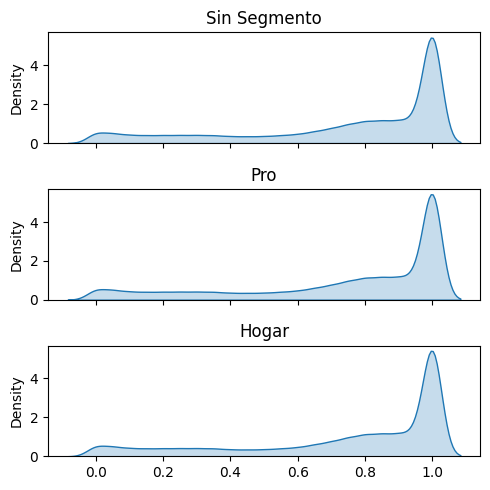

In [18]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax = ax.flat

sns.kdeplot(df['sim_b_sin_segmento'], fill=True, ax=ax[0])
ax[0].set_title('Sin Segmento')
ax[0].set_xlabel(None)
sns.kdeplot(df['sim_b_pro'], fill=True, ax=ax[1])
ax[1].set_title('Pro')
ax[1].set_xlabel(None)
sns.kdeplot(df['sim_b_hogar'], fill=True, ax=ax[2])
ax[2].set_title('Hogar')
ax[2].set_xlabel(None)


plt.tight_layout()

In [19]:
_threshold = .8
np.divide(df[df['sim_b_sin_segmento'] >= _threshold].shape[0], df.shape[0])

0.6035273905573799